In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def make_df(list,headerr):
    a = []
    for i in list:
        a_temp = pd.read_csv("VIS_NIR/{}".format(i),header=None,sep='\s+')
        a_temp.drop([2,3],axis=1, inplace=True)
        a_temp.columns = headerr
        a.append(a_temp)
    return a

In [58]:
# ---------------------------------
# header:
h=["wavelenght","Intensity"]
# ---------------------------------

# ---------------------------------
# lista archivos:
files = os.listdir("VIS_NIR/")
files = files[:10]
# ---------------------------------

# ---------------------------------
# sbdb_query_results:
sbdb = pd.read_csv("sbdb_query_results.csv")
sbdb = sbdb[:10]
# ---------------------------------

# ---------------------------------
# Data de asteroides:
[a01,a02,a03,a04,a05,a06,a07,a08,a09,a10] = make_df(files,h)
# ---------------------------------

In [4]:
a = make_df(files,h)

In [5]:
for i in range(len(a)):
    print(i,a[i].shape)

0 (527, 2)
1 (535, 2)
2 (524, 2)
3 (498, 2)
4 (528, 2)
5 (555, 2)
6 (528, 2)
7 (669, 2)
8 (528, 2)
9 (529, 2)


In [6]:
from scipy.interpolate import interp1d

In [59]:
a01.drop_duplicates(inplace=True)

In [60]:
a01

,wavelenght,Intensity
0,0.4350,0.9004
1,0.4375,0.9186
2,0.4400,0.9308
3,0.4425,0.9394
4,0.4450,0.9355
...,...,...
522,2.4700,1.0051
523,2.4750,1.0077
524,2.4800,1.0056
525,2.4850,1.0169


In [51]:
a01.index = range(len(a01))

In [52]:
a01_index = a01[a01.wavelenght.duplicated()].index
a01_index

Int64Index([192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
            205, 206, 207, 208, 209, 210, 211, 212],
           dtype='int64')

In [54]:
a01.drop(a01_index, inplace=True)
a01.index = range(len(a01))

In [57]:
x = a01.wavelenght
y = np.abs(a01.Intensity)

In [56]:
a02

,wavelenght,Intensity
0,0.4350,0.9235
1,0.4375,0.9906
2,0.4400,0.9750
3,0.4425,0.9417
4,0.4450,0.9799
...,...,...
500,2.4700,-1.0000
501,2.4750,-1.0000
502,2.4800,-1.0000
503,2.4850,-1.0000


In [12]:
len(x)

505

In [37]:
f = interp1d(x,y,kind='cubic')
xnew1 = np.linspace(min(x),0.983,12,endpoint=True)
xnew2 = np.linspace(0.983,1.531,6,endpoint=True)
xnew3 = np.linspace(1.531,2.49,8,endpoint=True)

In [38]:
old = np.linspace(min(x),max(x),200,endpoint=True)

In [39]:
x123 = np.concatenate((xnew1,xnew2,xnew3))
y123 = np.concatenate((f(xnew1),f(xnew2),f(xnew3)))
#len(x123)

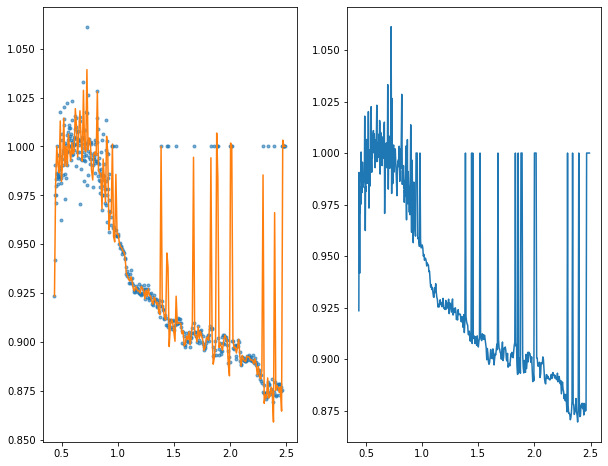

In [42]:
plt.figure(figsize=(10,8))
ax = plt.subplot(121)

ax.plot(x,y,".",alpha=0.6)
#ax.plot(x123,y123,color="red")
ax.plot(old,f(old))
#ax.plot(xnew1,f(xnew1))
#ax.plot(xnew2,f(xnew2))
#ax.plot(xnew3,f(xnew3))

ax1 = plt.subplot(122)
ax1.plot(x,y)


In [160]:
sbdb["name"] = sbdb["full_name"].apply( lambda x: x.split(" ")[-3])
sbdb["id"] = sbdb["full_name"].apply( lambda x: x.split(" ")[-4])

In [258]:
clast = sbdb[['id','name','spec_B']]
clast.head(10)

,id,name,spec_B
0,1,Ceres,C
1,2,Pallas,B
2,3,Juno,Sk
3,4,Vesta,V
4,5,Astraea,S
5,6,Hebe,S
6,7,Iris,S
7,10,Hygiea,C
8,11,Parthenope,Sk
9,12,Victoria,L


In [224]:
a01

,wavelenght,Intensity
0,0.4350,0.9004
1,0.4375,0.9186
2,0.4400,0.9308
3,0.4425,0.9394
4,0.4450,0.9355
...,...,...
500,2.4700,1.0051
501,2.4750,1.0077
502,2.4800,1.0056
503,2.4850,1.0169


In [228]:
lmb = a01.T
lmb = lmb.reset_index()
lmb.drop("index",axis=1, inplace=True)
lmb.columns = lmb.iloc[0]
lmb.drop(0,axis=0, inplace=True)
lmb

,0.4350,0.4375,0.4400,0.4425,0.4450,0.4475,0.4500,0.4525,0.4550,0.4575,...,2.4450,2.4500,2.4550,2.4600,2.4650,2.4700,2.4750,2.4800,2.4850,2.4900
1,0.9004,0.9186,0.9308,0.9394,0.9355,0.935,0.9231,0.9397,0.9569,0.9479,...,1.0057,1.011,1.0069,1.0035,1.0153,1.0051,1.0077,1.0056,1.0169,1.0118


In [223]:
lmb["asteroide"] = "Ceres"
lmb

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,asteroide
0,0.4350,0.4375,0.4400,0.4425,0.4450,0.4475,0.4500,0.4525,0.4550,0.4575,...,2.450,2.4550,2.4600,2.4650,2.4700,2.4750,2.4800,2.4850,2.4900,Ceres
1,0.9004,0.9186,0.9308,0.9394,0.9355,0.9350,0.9231,0.9397,0.9569,0.9479,...,1.011,1.0069,1.0035,1.0153,1.0051,1.0077,1.0056,1.0169,1.0118,Ceres


In [269]:
def tr(df1,df2,name):
    x1 = df2["spec_B"].tolist()
    x2 = df2["name"].tolist()
    df2_dir = { x2[i]:x1[i] for i in range(len(df2)) }

    df_temp = df1.T
    #print(df1)
    df_temp.columns = df_temp.iloc[0]
    
    df_temp.index = [0,name]
    df_temp.drop(0,axis=0, inplace=True)
    df_temp["spec_B"] = df2_dir[name]

    n_col = [df_temp.columns[-1]]
    for i in df_temp.columns[:-1].tolist():
        n_col.append(i)


    return df_temp[n_col]

In [216]:
def concat(list):
    for i in range(len(list)):
        temp = list[i].index = i
        


In [271]:
a05T = tr(a05,clast,"Astraea")
a05T

wavelenght,spec_B,0.435,0.4375,0.44,0.4425,0.445,0.4475,0.45,0.4525,0.455,...,2.445,2.45,2.455,2.46,2.465,2.47,2.475,2.48,2.485,2.49
Astraea,S,0.8291,0.8133,0.8261,0.8567,0.8582,0.8734,0.8504,0.856,0.8496,...,1.3109,1.3332,1.312,1.3293,1.3434,1.3421,1.3437,1.3488,1.3605,1.3783


In [283]:
a01T =tr(a01,clast,"Ceres")

In [279]:
a02T = tr(a02,clast,"Pallas")

In [287]:
for i in range(10):
    temp = tr(a[i],clast,clast.name[i])
    temp.to_csv("TRANSPUESTAS/{}.txt".format(i))

In [290]:
val0 = pd.read_csv("TRANSPUESTAS/0.txt")
val0

,Unnamed: 0,spec_B,0.435,0.4375,0.44,0.4425,0.445,0.4475,0.45,0.4525,...,2.445,2.45,2.455,2.46,2.465,2.47,2.475,2.48,2.485,2.49
0,Ceres,C,0.9004,0.9186,0.9308,0.9394,0.9355,0.935,0.9231,0.9397,...,1.0057,1.011,1.0069,1.0035,1.0153,1.0051,1.0077,1.0056,1.0169,1.0118


In [289]:
val1 = pd.read_csv("TRANSPUESTAS/1.txt")
val1

,Unnamed: 0,spec_B,0.435,0.4375,0.44,0.4425,0.445,0.4475,0.45,0.4525,...,2.445,2.45,2.455,2.46,2.465,2.47,2.475,2.48,2.485,2.49
0,Pallas,B,0.9235,0.9906,0.975,0.9417,0.9799,0.9711,0.9835,0.9752,...,0.8785,0.8768,0.8748,0.8754,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [297]:
m =pd.concat([val0,val1],axis=0)

In [299]:
m.columns

Index(['Unnamed: 0', 'spec_B', '0.435', '0.4375', '0.44', '0.4425', '0.445',
       '0.4475', '0.45', '0.4525',
       ...
       '0.795.2', '0.795.3', '0.8.2', '0.8.3', '0.805.2', '0.805.3', '0.81.2',
       '0.81.3', '0.815.2', '0.815.3'],
      dtype='object', length=599)

In [292]:
a01T

wavelenght,spec_B,0.435,0.4375,0.44,0.4425,0.445,0.4475,0.45,0.4525,0.455,...,2.445,2.45,2.455,2.46,2.465,2.47,2.475,2.48,2.485,2.49
Ceres,C,0.9004,0.9186,0.9308,0.9394,0.9355,0.935,0.9231,0.9397,0.9569,...,1.0057,1.011,1.0069,1.0035,1.0153,1.0051,1.0077,1.0056,1.0169,1.0118


In [293]:
a02T

wavelenght,spec_B,0.435,0.4375,0.44,0.4425,0.445,0.4475,0.45,0.4525,0.455,...,2.445,2.45,2.455,2.46,2.465,2.47,2.475,2.48,2.485,2.49
Pallas,B,0.9235,0.9906,0.975,0.9417,0.9799,0.9711,0.9835,0.9752,1.0005,...,0.8785,0.8768,0.8748,0.8754,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [305]:
print(a01T.shape)
print(a02T.shape)

(1, 506)
(1, 596)


In [320]:
a01T

wavelenght,spec_B,0.435,0.4375,0.44,0.4425,0.445,0.4475,0.45,0.4525,0.455,...,2.445,2.45,2.455,2.46,2.465,2.47,2.475,2.48,2.485,2.49
Ceres,C,0.9004,0.9186,0.9308,0.9394,0.9355,0.935,0.9231,0.9397,0.9569,...,1.0057,1.011,1.0069,1.0035,1.0153,1.0051,1.0077,1.0056,1.0169,1.0118


In [329]:
a = []
b = []
c = a01T.columns.values.tolist()
d = a01T.iloc[0].tolist()
e = a02T.columns.values.tolist()
f = a02T.iloc[0].tolist()

In [333]:
hola = pd.concat([a01T.T,a02T.T],axis=0)

In [ ]:
pd.merge()

In [338]:
a01

,wavelenght,Intensity
0,0.4350,0.9004
1,0.4375,0.9186
2,0.4400,0.9308
3,0.4425,0.9394
4,0.4450,0.9355
...,...,...
500,2.4700,1.0051
501,2.4750,1.0077
502,2.4800,1.0056
503,2.4850,1.0169


In [339]:
hola.index

Index(['spec_B',    0.435,   0.4375,     0.44,   0.4425,    0.445,   0.4475,
           0.45,   0.4525,    0.455,
       ...
          2.445,     2.45,    2.455,     2.46,    2.465,     2.47,    2.475,
           2.48,    2.485,     2.49],
      dtype='object', name='wavelenght', length=1102)

In [341]:
hola["hola"] = hola.index().apply(lambda x: x)

TypeError: 'Index' object is not callable

In [330]:
a01T.T

,Ceres
wavelenght,
spec_B,C
0.435,0.9004
0.4375,0.9186
0.44,0.9308
0.4425,0.9394
...,...
2.47,1.0051
2.475,1.0077
2.48,1.0056


In [ ]:
convolucion 